In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [44]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['species'].nunique()

3

In [7]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [8]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

BOXPLOT

<Axes: >

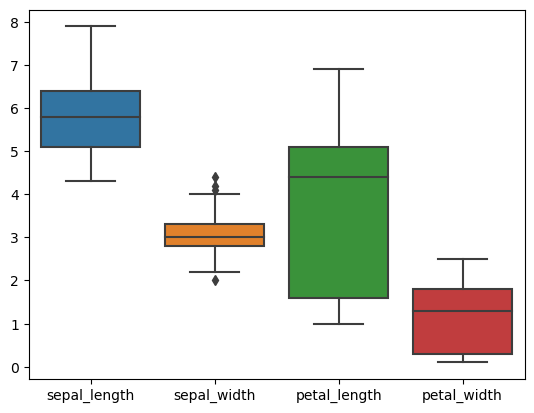

In [11]:
sns.boxplot(data=df)

<Axes: ylabel='species'>

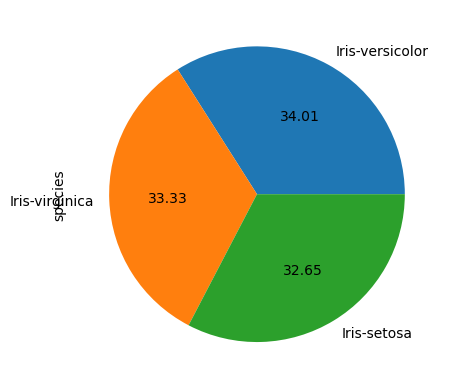

In [12]:
df['species'].value_counts().plot(kind='pie', autopct = '%.2f')

(array([ 9., 21., 14., 27., 15., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

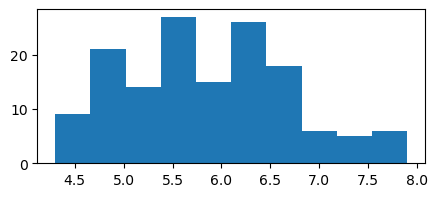

In [45]:
plt.figure(figsize=(5,2))
plt.hist(df['sepal_length'])

(array([ 4.,  7., 21., 24., 36., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

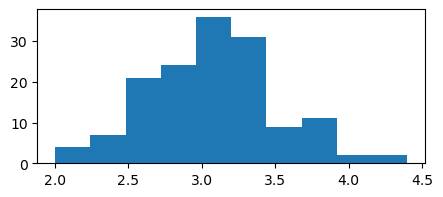

In [46]:
plt.figure(figsize=(5,2))
plt.hist(df['sepal_width'])

(array([35., 13.,  0.,  3.,  8., 26., 28., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

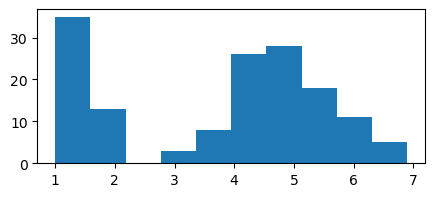

In [47]:
plt.figure(figsize=(5,2))
plt.hist(df['petal_length'])

In [13]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


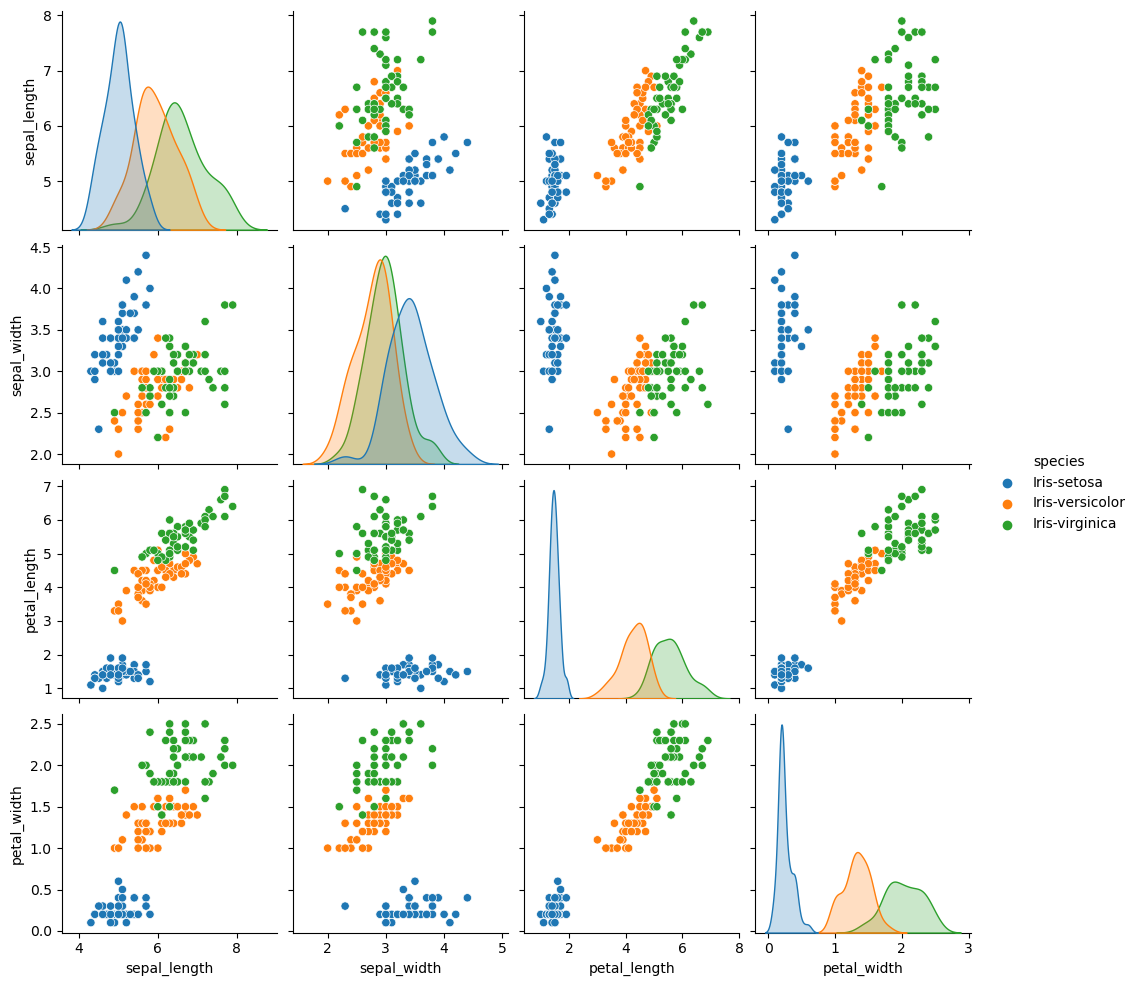

In [14]:
sns.pairplot(data=df,hue="species")

<Axes: xlabel='sepal_length', ylabel='species'>

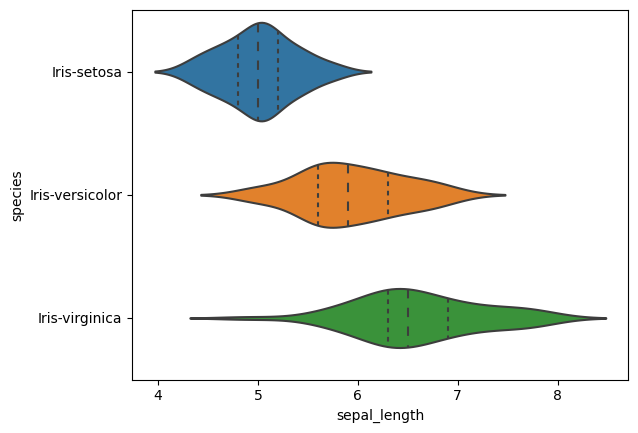

In [15]:
sns.violinplot(y='species',x='sepal_length',data=df,inner='quartile')

<Axes: xlabel='petal_length', ylabel='species'>

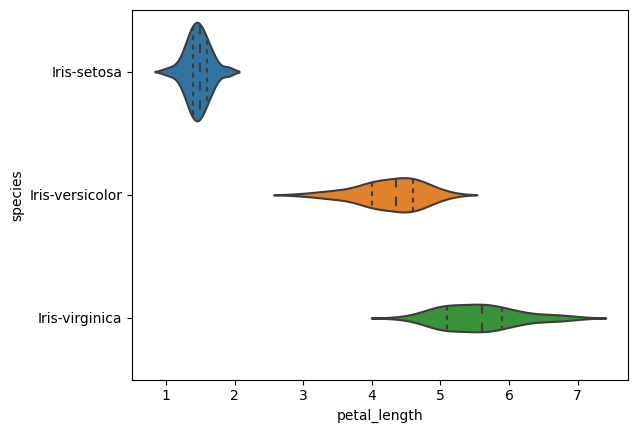

In [16]:
sns.violinplot(y='species',x='petal_length',data=df,inner='quartile')

<Axes: xlabel='sepal_width', ylabel='species'>

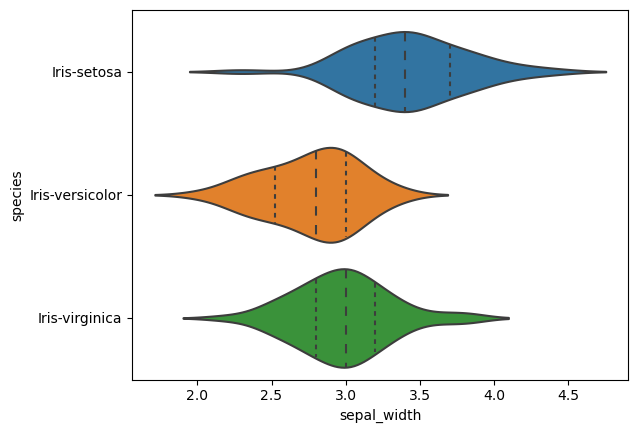

In [17]:
sns.violinplot(y='species',x='sepal_width',data=df,inner='quartile')

<Axes: xlabel='petal_width', ylabel='species'>

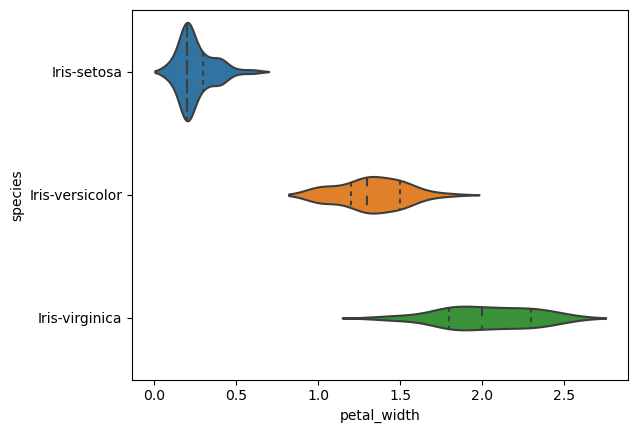

In [18]:
sns.violinplot(y='species',x='petal_width',data=df,inner='quartile')GG

In [19]:
X = df.drop(['species'],axis=1)

In [20]:
y=df['species']

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [22]:
#now expeiment with diff k values
k_range=list(range(1,26))
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred_y=knn.predict(X)
    scores.append(accuracy_score(y,pred_y))

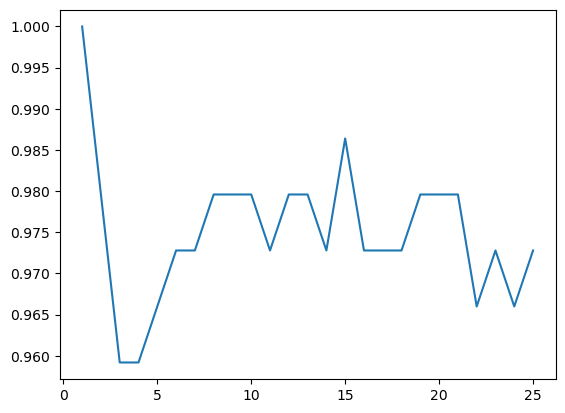

In [23]:
plt.plot(k_range,scores)

In [24]:
from sklearn.linear_model import LogisticRegression 
lg=LogisticRegression()
lg.fit(X,y)
pred_y=lg.predict(X)
print(accuracy_score(y,pred_y))

0.9727891156462585


In [25]:
# predicting using train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.6,test_size=0.4,random_state=5)

In [26]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(88, 4) (59, 4) (88,) (59,)


In [27]:
from sklearn.preprocessing import LabelEncoder
Lab_enc = LabelEncoder()
Lab_enc.fit(y)

LabelEncoder()

In [28]:
y = Lab_enc.transform(y)

In [29]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [30]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
model_2 = LogisticRegression()
model_2.fit(X_train_scaled,y_train) 

LogisticRegression()

In [32]:
model_2_pred = model_2.predict(X_test_scaled)

In [33]:
accuracy_score(model_2_pred, y_test)

0.9322033898305084

In [34]:
#Now using split data and kneighbor classifier
k_range=list(range(1,26))
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred_y=knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred_y))


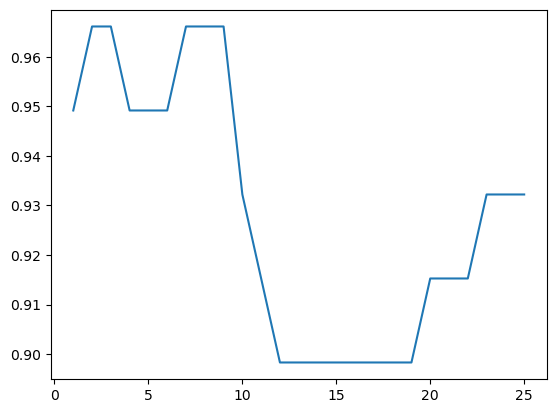

In [35]:
plt.plot(k_range,scores)

In [36]:
log=LogisticRegression()
log.fit(X_train,y_train)
y_preds=log.predict(X_test)
print(accuracy_score(y_test,y_preds))

0.9491525423728814


In [37]:
#k=12 or 14 or 16 is best one
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [38]:
prediction = knn.predict(X_test)

In [39]:
accuracy_score(y_test,prediction)

0.8983050847457628

In [40]:
knn.predict([[2,3,4,5]])

array(['Iris-versicolor'], dtype=object)

In [41]:
knn.predict([[5,6,2,3]])

array(['Iris-setosa'], dtype=object)

In [42]:
knn.predict([[5,1,1,8]])

array(['Iris-versicolor'], dtype=object)